In [1]:
import scipy as sp
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

from ggqpy import construct_Chebyshev_quadratures
from ggqpy.functionfamiliy import Interval
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix
from ggqpy.optimize import QuadOptimizer
from ggqpy.visualize import plot_points

5810 points


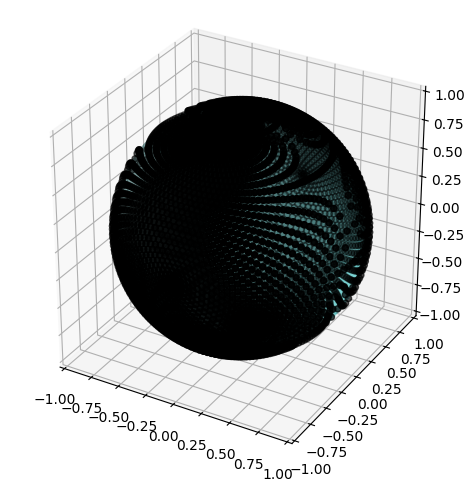

In [2]:
data = np.genfromtxt('lebedev131.txt')
phi, theta, w = np.hsplit(data, 3)
phi = phi.flatten()
theta = theta.flatten()
w = w.flatten()

phi = (phi/180 + 1)*np.pi
theta = theta*np.pi/180
print(len(w), "points")
plot_points(theta,phi)

In [14]:
s = 0
for x in range(132):
    s += 2*x + 1
print(s//2)

8712


In [4]:
deg = 131
x = np.arange(deg+1)
y = np.arange(deg+1)
z = np.arange(deg+1)
A = x[:,np.newaxis,np.newaxis] + y[np.newaxis,:,np.newaxis] + z[np.newaxis,np.newaxis,:]
print((A <= 131).astype(int).sum())
print((132**3)/6)

392084
383328.0


In [5]:

abs(sp.special.sph_harm(50,131,phi,theta))**2@w*4*np.pi

1.024140631801337

In [6]:
p = 131
N = len(w)
E = (p + 1)**2/(3*N)
print(E)

0.9996557659208262


In [12]:
sp.special.binom(131+3-1,131)
# len(w)

8778.0

In [18]:
from math import factorial as fac
d = 3
n = 131

(2*n+d-2)*fac(n+d-3)/(fac(n)*fac(d-2))

263.0